<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Topic 2. Visual data analysis
## <center>Practice. Analyzing "Titanic" passengers. Solution

**Fill in the missing code ("Your code here"). No need to select answers in a webform.**

**<a href="https://www.kaggle.com/c/titanic">Competition</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

**Read data**

In [2]:
train_df = pd.read_csv("../../data/titanic_train.csv", 
                       index_col='PassengerId') 

In [3]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Stone, Mrs. George Nelson (Martha Evelyn)",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Let's drop`Cabin`, and then – all rows with missing values.**

In [6]:
train_df = train_df.drop('Cabin', axis=1).dropna()

In [7]:
train_df.shape

(712, 10)

**1. Build a picture to visualize all scatter plots for each pair of features `Age`, `Fare`, `SibSp`, `Parch` and `Survived`. ( `scatter_matrix ` from Pandas or `pairplot` from Seaborn)**

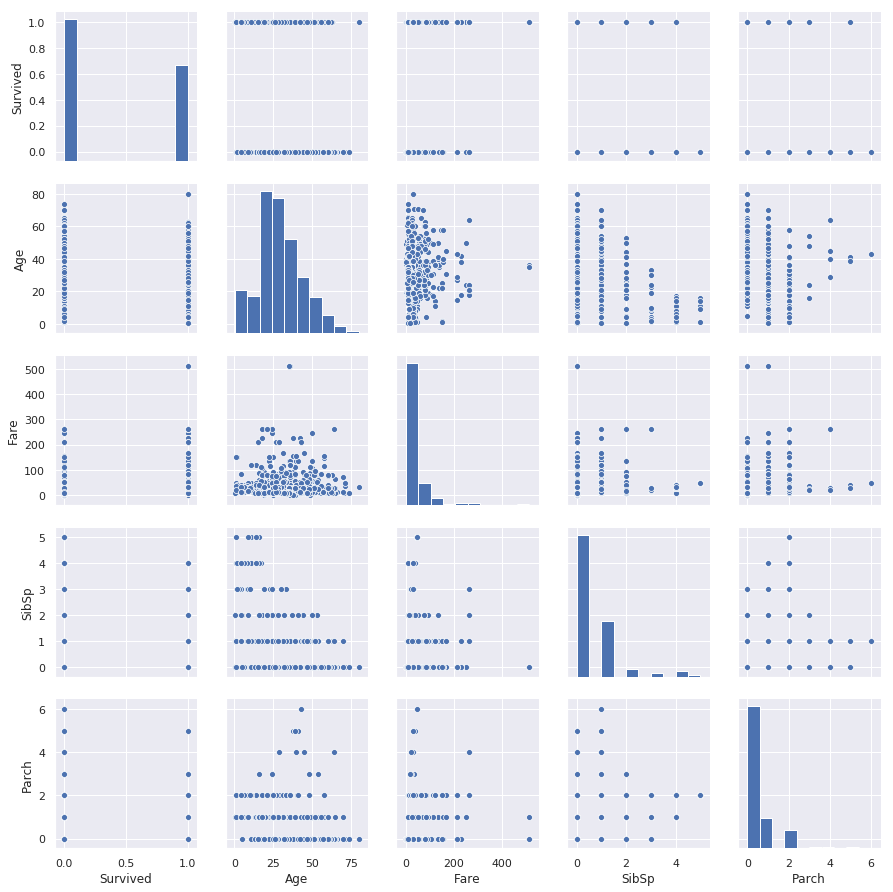

In [8]:
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']]);

**2. How does ticket price (`Fare`) depend on `Pclass`? Build a boxplot.**

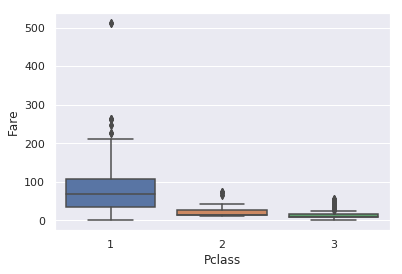

In [9]:
sns.boxplot(x='Pclass', y='Fare', data=train_df);

**3. Let's build the same plot but restricting values of `Fare` to be less than 95% quantile of the initial vector (to drop outliers that make the plot less clear).**

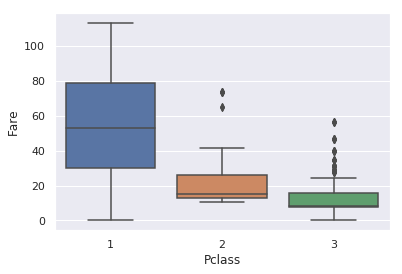

In [10]:
sns.boxplot(x='Pclass', y='Fare', data=train_df[train_df['Fare'] < train_df['Fare'].quantile(.95)]);

**4. How the percantage of survived passengers is dependent on passengers' gender? Depict it with `Seaborn.countplot` using the `hue` argument.**

In [11]:
pd.crosstab(train_df['Sex'], train_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


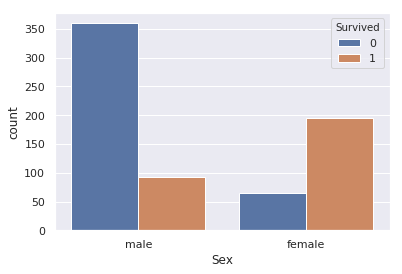

In [12]:
sns.countplot(x="Sex", hue="Survived", data=train_df);

Let's do the same for `Survived` and `Pclass`

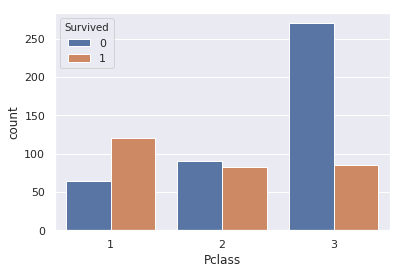

In [13]:
sns.countplot(x="Pclass", hue="Survived", data=train_df);

**5. How does distibution of ticket prices differ for those who survived and those who didn't. Depict it with `Seaborn.boxplot`**

Sad truth, those who survived, typically had paid much more for their tickets.

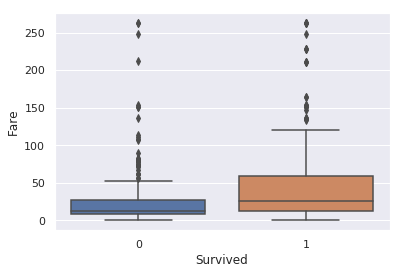

In [14]:
sns.boxplot(x='Survived', y='Fare', data=train_df[train_df['Fare'] < 500]);

**6. How survival depended on passengers' age?  Verify (graphically) an assumption that youngsters (< 30 y.o.) survived more frequently than old people (> 55 y.o.).**

Let's first build this boxplot

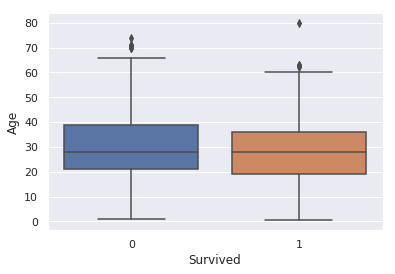

In [15]:
sns.boxplot(x='Survived', y='Age', data=train_df);

We can further split by classes.

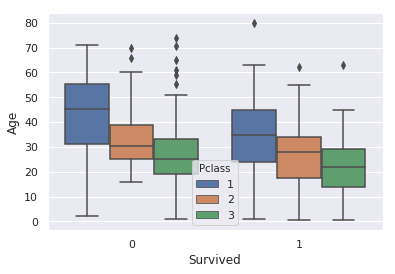

In [16]:
sns.boxplot(x='Survived', hue='Pclass', y='Age', data=train_df);

Hmm.. hard to conclude anything. Let's do it in another way.

In [17]:
train_df['age_cat'] = train_df['Age'].apply(lambda age: 1 if age < 30 
                                            else 3 if age > 55 else 2);

In [18]:
pd.crosstab(train_df['age_cat'], train_df['Survived'])

Survived,0,1
age_cat,,
1,228,156
2,168,121
3,28,11


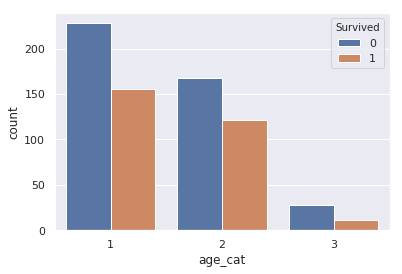

In [19]:
sns.countplot(x='age_cat', hue='Survived', data=train_df);

We could have guessed that the fraction of survived passengers is lower among old people. However, to few observations for serious conclusions.